In [3]:
import itertools
import pandas as pd
import itertools
from craps_runner import CrapsRunner
import seaborn as sns
from matplotlib import pyplot as plt
from copy import deepcopy

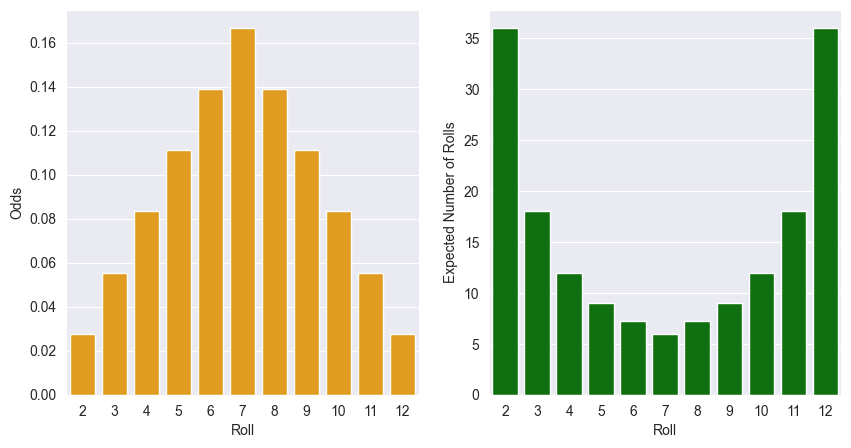

In [6]:
# create teh crapsRunner object
craps_runner = CrapsRunner()
# plot the odds as a bar graph
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(craps_runner.df_roll_outcomes, y="Odds", x="Roll", color="orange", ax=ax[0])
sns.barplot(craps_runner.df_roll_outcomes, x="Roll", y="Expected_Rolls", color="green", ax=ax[1])
ax[1].set_ylabel("Expected Number of Rolls")
plt.savefig('expected_rolls.png', bbox_inches='tight')
plt.show()

    Roll      Odds  Expected_Rolls  Place_Bet_Payoff  Odds_Bet_Payoff
0      2  0.027778            36.0               NaN              NaN
1      3  0.055556            18.0               NaN              NaN
2      4  0.083333            12.0          1.800000              2.0
3      5  0.111111             9.0          1.400000              1.5
4      6  0.138889             7.2          1.166667              1.2
5      7  0.166667             6.0               NaN              NaN
6      8  0.138889             7.2          1.166667              1.2
7      9  0.111111             9.0          1.400000              1.5
8     10  0.083333            12.0          1.800000              2.0
9     11  0.055556            18.0               NaN              NaN
10    12  0.027778            36.0               NaN              NaN


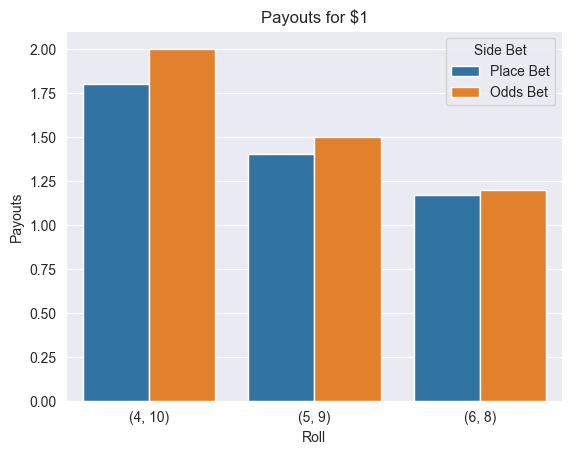

In [17]:
# get the expected number of rolls for 6 and 8
# conditional_prob = craps_runner.get_dice_sum_probability(k=6) + craps_runner.get_dice_sum_probability(k=8)
# conditional_prob2 = craps_runner.get_dice_sum_probability(k=4) + craps_runner.get_dice_sum_probability(k=10)
# expected_rolls = craps_runner.get_expected_num_rolls(p=conditional_prob)
# expected_rolls2 = craps_runner.get_expected_num_rolls(p=conditional_prob2)
# print(f"Expected number of rolls for either a 6 or 8: {expected_rolls}")
# print(f"Expected number of rolls for a 7: {craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes['Roll'] == 7]['Expected_Rolls'].values[0]}")
# print(f"Expected number of rolls for either a 4 or 10: {expected_rolls2}")

# conditional_prob_win = craps_runner.get_dice_sum_probability(k=7) + craps_runner.get_dice_sum_probability(k=11)
# conditional_prob_lose = craps_runner.get_dice_sum_probability(k=2) + craps_runner.get_dice_sum_probability(k=3) + craps_runner.get_dice_sum_probability(k=12)
# conditional_prob_point = 1 - (conditional_prob_win + conditional_prob_lose)
#
# check_probs = 0.0
# for x in [4, 5, 6, 8, 9, 10]:
#     check_probs += craps_runner.get_dice_sum_probability(k=x)
#
# print(f"{conditional_prob_point}\n{check_probs}")
#
# probs = [conditional_prob_win, conditional_prob_lose, conditional_prob_point]
# categories = ['Win', "Lose/ Don't Pass", 'Point']
#
# # create a dataframe
# data = {'category': categories, 'probability': probs}
# df_initial_roll = pd.DataFrame(data)
#
# # plot the probabilities
# df_initial_roll.sort_values('probability', ascending=False, inplace=True)
# sns.barplot(df_initial_roll, x="category", y="probability", color="purple").set_title("Initial Roll Probabilities")
# plt.savefig('plots/initial_rolls.png', bbox_inches='tight')

################# graph the payouts for odds and place bets
print(craps_runner.df_roll_outcomes)

roll_outcome = ['(4, 10)', '(5, 9)', '(6, 8)'] + ['(4, 10)', '(5, 9)', '(6, 8)']
pay_pout_category = ['Place Bet', 'Place Bet', 'Place Bet', 'Odds Bet', 'Odds Bet', 'Odds Bet']
payouts = [1.8, 1.4, 1.1666667, 2, 1.5, 1.2]

payouts_data = {'Roll': roll_outcome, 'Payouts': payouts, 'Side Bet': pay_pout_category}
df_payouts = pd.DataFrame(payouts_data)

sns.barplot(df_payouts, x='Roll', y='Payouts', hue='Side Bet').set_title("Payouts for $1")
plt.savefig('plots/payouts.png', bbox_inches='tight')

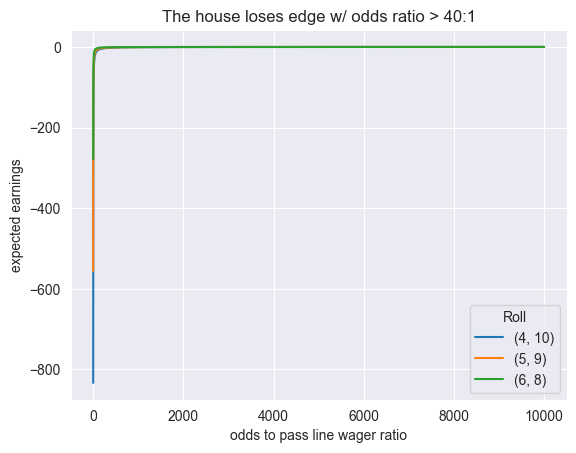

In [44]:
# generate a list of numbers transcending from 150 to 50 in increments of 1
odds_wager = list(range(10001, 0, -1))
passline_wager = list(range(1, 10002))

# len(odds_wager) == len(passline_wager)

def calc_expected_earnings(odds_wager: int, passline_wager: int, k: int, df: pd.DataFrame):
    """
    Calculate the expected earnings for a passline bet
    :param odds_wager:
    :param passline_wager:
    :param k:
    :param df:
    :return:
    """
    point_odds = df[df['Roll'] == k]['Odds'].values[0]
    odds_payout = df[df['Roll'] == k]['Odds_Bet_Payoff'].values[0]
    odds_loss = df[df['Roll'] == 7]['Odds'].values[0]

    return (point_odds * ((odds_wager * odds_payout) + passline_wager)) + (odds_loss * ((-1 * odds_wager) + (-1 * passline_wager)))

# create the dataframe
dfs = []
for k in [4, 5, 6]:
    df_tmp = pd.DataFrame({'odds wager': odds_wager, 'passline wager': passline_wager})
    df_tmp['Roll'] = k
    df_tmp['expected earnings'] = df_tmp[['odds wager', 'passline wager']].apply(lambda x: calc_expected_earnings(odds_wager=x['odds wager'], passline_wager=x['passline wager'], k=k, df=craps_runner.df_roll_outcomes), axis=1)
    dfs.append(df_tmp)

df_final = pd.concat(dfs)
df_final[df_final['odds wager'] == 51].head()
# # calcuate the ratio of the odds bet to passline bet
df_final['odds ratio'] = df_final['odds wager'] / df_final['passline wager']
def odds_label(val: int) -> str:
    if val == 4:
        return "(4, 10)"
    if val == 5:
        return "(5, 9)"
    if val == 6:
        return "(6, 8)"

df_final['Roll'] = df_final['Roll'].apply(lambda x: odds_label(val=x))
sns.lineplot(df_final, x='odds ratio', y='expected earnings', hue='Roll').set_title("The house loses edge w/ odds ratio > 40:1")
plt.xlabel('odds to pass line wager ratio')
plt.ylabel('expected earnings')
plt.savefig('odds_ratios.png', bbox_inches='tight')




In [33]:
df_final.head()

,odds wager,passline wager,Roll,expected earnings,odds ratio
0,101,1,4,-0.083333,101.0
1,100,2,4,-0.166667,50.0
2,99,3,4,-0.250000,33.0
3,98,4,4,-0.333333,24.5
4,97,5,4,-0.416667,19.4


In [46]:
# generate permutations of the below list
place_bets = [4, 5, 6, 8, 9, 10]
all_combs = []
for r in range(1, len(place_bets) + 1):
    all_combs.extend(itertools.combinations(place_bets, r))
combination_vals = []
expected_rolls_vals = []
for comb in all_combs:
    prob = 0
    string_rep = ""
    counter_idx = 0
    for val in comb:
        prob += craps_runner.get_dice_sum_probability(val)
        if counter_idx == 0:
            string_rep += f"{val}"
        else:
            string_rep += f", {val}"
        counter_idx += 1
    combination_vals.append(string_rep)
    expected_rolls_vals.append(craps_runner.get_expected_num_rolls(prob))

def get_combination_prob(combination: str) -> float:
    # split the string 456 into a list of interger vals
    combo_list = combination.split(",")
    combo_list = [int(x) for x in combo_list]
    # print(f"Combination: {combo_list}")
    probs = [craps_runner.get_dice_sum_probability(k=x) for x in combo_list]
    return sum(probs)

df_combinations = pd.DataFrame(combination_vals, columns=["Combination"])
df_combinations["Odds"] = df_combinations["Combination"].apply(lambda x: get_combination_prob(x))
df_combinations["Expected_Rolls"] = df_combinations["Odds"].apply(lambda x: craps_runner.get_expected_num_rolls(x))
df_combinations["id combination"] = df_combinations.index

df_combinations.tail()

,Combination,Odds,Expected_Rolls,id combination
58,"4, 5, 6, 9, 10",0.527778,1.894737,58
59,"4, 5, 8, 9, 10",0.527778,1.894737,59
60,"4, 6, 8, 9, 10",0.555556,1.800000,60
61,"5, 6, 8, 9, 10",0.583333,1.714286,61
62,"4, 5, 6, 8, 9, 10",0.666667,1.500000,62


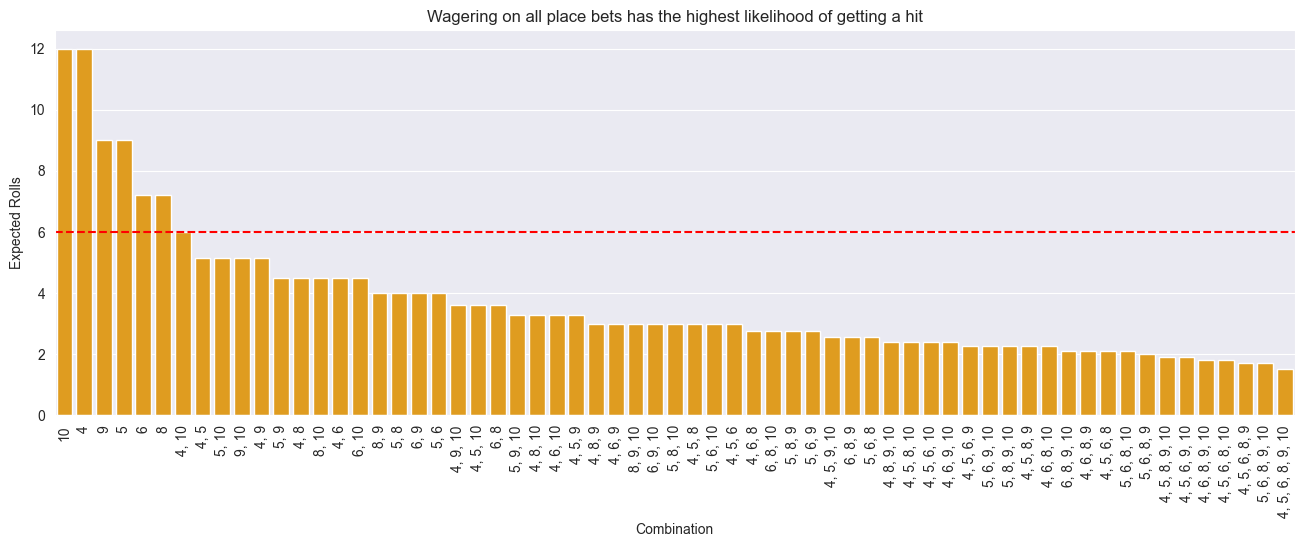

In [51]:
plt.figure(figsize=(16, 5))
df_combinations.sort_values(by="Expected_Rolls", ascending=False, inplace=True)
sns.barplot(df_combinations, x="Combination", y="Expected_Rolls", color="orange")
plt.axhline(y=6, linestyle="--", color="red")
# rotate the x axis labels
plt.xticks(rotation=90)
plt.ylabel("Expected Rolls")
plt.title("Wagering on all place bets has the highest likelihood of getting a hit")
plt.savefig('plots/expected_rolls.png', bbox_inches='tight')

All Place Bets
The median with point roll 6: 2.0
The median with point roll 4: 2.0
Place Bets 6 and 8
The median with point roll 6: 2.0
The median with point roll 4: 1.0
Place Bets 4 and 10
The median with point roll 6: 0.0
The median with point roll 4: 0.0


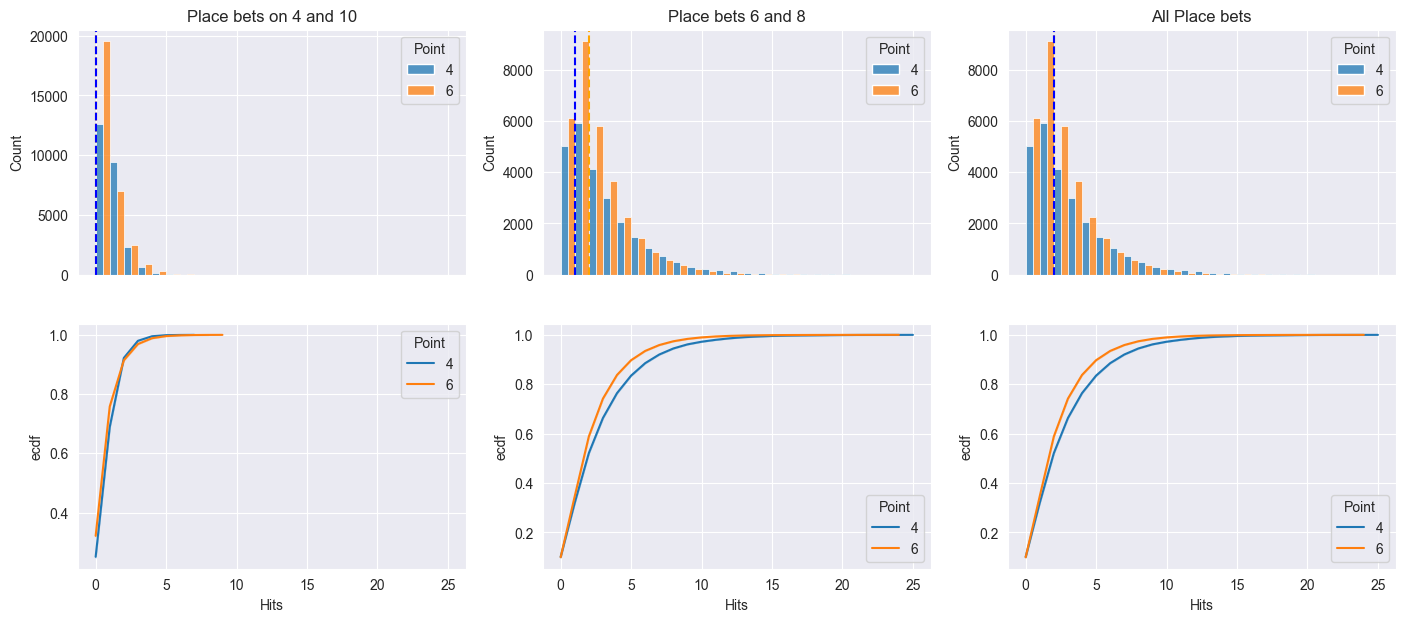

In [71]:

# create a subplot
fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, figsize=(17, 7))
samples1 = craps_runner.simulate_place_bet_hits(point=6, place_bet=[4, 5, 6, 8, 9, 10])
samples2 = craps_runner.simulate_place_bet_hits(point=4, place_bet=[4, 5, 6, 8, 9, 10])

df_1 = pd.DataFrame(samples1, columns=["Hits"])
df_1["Point"] = "6"
median1 = df_1["Hits"].median()
print(f"All Place Bets")
print(f"The median with point roll 6: {median1}")

df_2 = pd.DataFrame(samples2, columns=["Hits"])
df_2["Point"] = "4"
median2 = df_2["Hits"].median()
print(f"The median with point roll 4: {median2}")

df_final = pd.concat([df_1, df_2])
# Sort values first if needed
df_final = df_final.sort_values(['Point', 'Hits'])
# Calculate ECDF per group
df_final['ecdf'] = df_final.groupby('Point')['Hits'].rank(method='first', pct=True)
sns.histplot(df_final, x='Hits', hue='Point', multiple="dodge", binwidth=1, ax=ax[0, 2]).set_title(f"All Place bets")
sns.lineplot(df_final, x="Hits", y="ecdf", hue='Point', ax=ax[1, 2])
ax[0, 2].axvline(x=median1, linestyle="--", color="orange")
ax[0, 2].axvline(x=median2, linestyle="--", color="blue")

##########################################################################################

samples5 = craps_runner.simulate_place_bet_hits(point=6, place_bet=[6, 8])
samples6 = craps_runner.simulate_place_bet_hits(point=4, place_bet=[6, 8])

df_5 = pd.DataFrame(samples1, columns=["Hits"])
df_5["Point"] = "6"
print(f"Place Bets 6 and 8")
median5 = df_5["Hits"].median()
print(f"The median with point roll 6: {median5}")

df_6 = pd.DataFrame(samples6, columns=["Hits"])
df_6["Point"] = "4"
median6 = df_6["Hits"].median()
print(f"The median with point roll 4: {median6}")

df_final3 = pd.concat([df_5, df_6])
# Sort values first if needed
df_final3 = df_final.sort_values(['Point', 'Hits'])
# Calculate ECDF per group
df_final3['ecdf'] = df_final3.groupby('Point')['Hits'].rank(method='first', pct=True)
sns.histplot(df_final3, x='Hits', hue='Point', multiple="dodge", binwidth=1, ax=ax[0, 1]).set_title(f"Place bets 6 and 8")
sns.lineplot(df_final3, x="Hits", y="ecdf", hue='Point', ax=ax[1, 1])
ax[0, 1].axvline(x=median5, linestyle="--", color="orange")
ax[0, 1].axvline(x=median6, linestyle="--", color="blue")

###########################################################################################


samples3 = craps_runner.simulate_place_bet_hits(point=6, place_bet=[4, 10])
samples4 = craps_runner.simulate_place_bet_hits(point=4, place_bet=[4, 10])

df_3 = pd.DataFrame(samples3, columns=["Hits"])
df_3["Point"] = "6"
median3 = df_3["Hits"].median()
print(f"Place Bets 4 and 10")
print(f"The median with point roll 6: {median3}")

df_4 = pd.DataFrame(samples4, columns=["Hits"])
df_4["Point"] = "4"
median4 = df_4["Hits"].median()
print(f"The median with point roll 4: {median4}")

df_final2 = pd.concat([df_3, df_4])
df_final2 = df_final2.sort_values(['Point', 'Hits'])
# Calculate ECDF per group
df_final2['ecdf'] = df_final2.groupby('Point')['Hits'].rank(method='first', pct=True)
sns.histplot(df_final2, x='Hits', hue='Point', multiple="dodge", binwidth=1, ax=ax[0, 0]).set_title(f"Place bets on 4 and 10")
sns.lineplot(df_final2, x="Hits", y="ecdf", hue='Point', ax=ax[1, 0])
ax[0, 0].axvline(x=median3, linestyle="--", color="orange")
ax[0, 0].axvline(x=median4, linestyle="--", color="blue")

plt.savefig(f"plots/number_hits.png", bbox_inches='tight')


Successfully created dfs


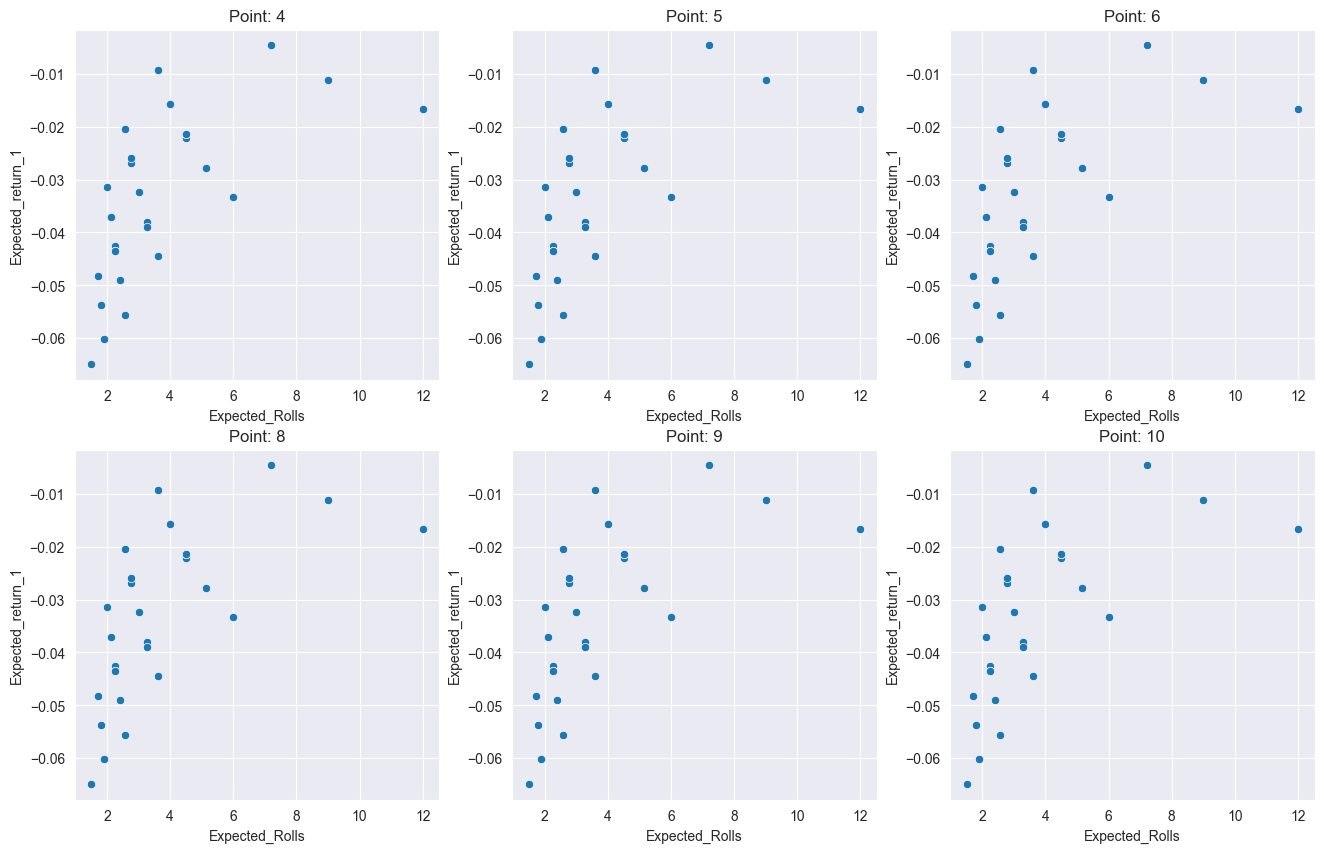

In [41]:
# calculate the expected return with an equal weighting between all place bets
def calc_expected_return(place: str,
                         point: int,
                         odds_bet: bool,
                         min_bet_amount: int = 25) -> float:
    """
    calculate the expected return for a place bet.
    :param place:
    :param point:
    :param min_bet_amount:
    :param odds_bet
    :return:
    """
    combo_list = place.split(",")
    combo_list = [int(x) for x in combo_list]
    expected_vals = []
    for x in combo_list:
        # calculate the expected return value
        place_bet_payout = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == x]["Place_Bet_Payoff"].values[0]
        place_bet_odds = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == x]["Odds"].values[0]
        place_bet_loss = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == 7]["Odds"].values[0]
        expected_val = (place_bet_odds * (place_bet_payout * min_bet_amount)) + ((-1 * min_bet_amount) * place_bet_loss)
        expected_vals.append(expected_val)
    if odds_bet:
        odds_payout = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == point]["Odds_Bet_Payoff"].values[0]
        point_odds = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == point]["Odds"].values[0]
        odds_bet_loss = craps_runner.df_roll_outcomes[craps_runner.df_roll_outcomes["Roll"] == 7]["Odds"].values[0]
        expected_odds_payoff = (point_odds * (odds_payout * min_bet_amount)) + ((-1 * min_bet_amount) * odds_bet_loss)
        expected_vals.append(expected_odds_payoff)
    return sum(expected_vals)


dfs = []
for point_number in [4, 5, 6, 8, 9, 10]:
    df_tmp = deepcopy(df_combinations)
    df_tmp["Expected_return_1"] = df_tmp["Combination"].apply(lambda x: calc_expected_return(place=x, point=point_number, odds_bet=False, min_bet_amount=1))
    dfs.append(df_tmp)

print("Successfully created dfs")

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(16, 10))
ax = ax.flatten()
counter_i = 0
for i in [4, 5, 6, 8, 9, 10]:
    sns.scatterplot(dfs[counter_i], x="Expected_Rolls", y="Expected_return_1", ax=ax[counter_i]).set_title(f"Point: {i}")
    counter_i += 1


In [43]:
counter_i = 0
for i in [4, 5, 6, 8, 9, 10]:
    df_current = dfs[counter_i] #, x="Expected_Rolls", y="Expected_return_1", ax=ax[counter_i]).set_title(f"Point: {i}")
    max_val = df_current["Expected_return_1"].max()
    group_val = df_current[df_current["Expected_return_1"] == max_val]["Combination"].values
    counter_i += 1
    print(f"\nAt point {i} Group val: {group_val}\nMax val: {max_val}\n")


At point 4 Group val: ['6' '8']
Max val: -0.004629629629629595


At point 5 Group val: ['6' '8']
Max val: -0.004629629629629595


At point 6 Group val: ['6' '8']
Max val: -0.004629629629629595


At point 8 Group val: ['6' '8']
Max val: -0.004629629629629595


At point 9 Group val: ['6' '8']
Max val: -0.004629629629629595


At point 10 Group val: ['6' '8']
Max val: -0.004629629629629595



In [45]:
df_combinations[df_combinations['Combination'] == '6, 8']

,Combination,Odds,Expected_Rolls,id combination
15,"6, 8",0.277778,3.6,15
